<a href="https://colab.research.google.com/github/JiSu0708/ESAA-YB/blob/main/%EB%B9%85%EB%B6%84%EB%B0%A92_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 기본 통계량 계산

통계량 계산, 데이터 분석 패키지 - numpy, scipy

In [468]:
# import package
import numpy as np
import pandas as pd
import scipy as sp

In [469]:
# 예제 데이터 생성
fish_data = np.array([2,3,3,4,4,4,4,5,5,6])

In [470]:
# 기본적인 통계량 계산

## sum
print(np.sum(fish_data))

## mean
print(np.mean(fish_data))

## variance
### 일반적으로 분산은 불편분산을 이용함
print(np.var(fish_data))          # ddof=0(디폴트값): 잔차의 합을 n으로 나눈 경우
print(np.var(fish_data, ddof=1))  # ddof=1: 잔차 합 / (n-1)

## standard variance
### 방법1)
print(np.std(fish_data))
print(np.std(fish_data, ddof=1))

### 방법2)
print(np.sqrt(np.var(fish_data, ddof=1)))

## Max, Min
print(np.max(fish_data))
print(np.min(fish_data))

## median
print(np.median(fish_data))

## quantile
print(np.quantile(fish_data, 0.25)) # first quantile
print(np.quantile(fish_data, 0.5))  # second quantile
print(np.quantile(fish_data, 0.75)) # third quantile

40
4.0
1.2
1.3333333333333333
1.0954451150103321
1.1547005383792515
1.1547005383792515
6
2
4.0
3.25
4.0
4.75


# 2. sklearn of machine learning

## 1) Built-in dataset

- load_diabetes(): regression
- load_iris(), load_digits(), load_wine(), load_breat_cancer(): classification
- load_linnerud()


## 2) Dataset

- key-value 형식으로 구성됨(dictionary형 타입과 유사한 구조)
- 용어
> data: X(설명변수, feature), 배열 형태 또는 matrix.
target: Y(종속변수)
Feature_names
target_names
DESCR
filename

# 2. sklearn of machine learning

## 1) Built-in dataset

- load_diabetes(): regression
- load_iris(), load_digits(), load_wine(), load_breat_cancer(): classification
- load_linnerud()


## 2) Dataset

- key-value 형식으로 구성됨(dictionary형 타입과 유사한 구조)
- 용어
> - **data**: feature(설명변수, X), 배열 형태 또는 matrix
  - **target**: target(종속변수, Y), 배열 형태 또는 matrix (주로 vector)
  - **Feature_names**: feature 데이터(X) 이름
  - **target_names**: target 데이터(Y) 이름
  - **DESCR**: 데이터 셋에 대한 설명
  - **filename**: 데이터 셋의 파일 저장 위치(csv)  

# 3. Regression 

**regression** 
- Y(종속변수, target)가 numeric(수치형)인 경우  
(\* classification: Y가 categorical(범주형)인 경우)

- X(독립변수들)과 Y(종속변수) 사이의 관계를 모델링하여 예측값을 구하는 방법
> - SLR(Simple Linear Regression): 하나의 X(설명변수, feature)
  - MLR(Multiple Linear Regression): 여러개의 X(multiple features)

\* python에서는 X: feature, Y: target이라고 함

## 1) Python for Regression

In [471]:
# model 들어있는 package import
from sklearn.linear_model import LinearRegression

In [472]:
# package에서 이용할 모델 정의
model = LinearRegression()

정의한 모델에 이용할 수 있는 메서드

- **fit(X, y[, sample_weight])**: Fit linear model
- **get_params([deep])**: Get parameters for this estimator
- **predict(X)**: Predict using the linear model
- **score(X, y[, sample_weight])**: Returns the **coefficient** of determination **R-squared** of the prediction

\* **R-squared(결정계수)**
- **전체 Y의 변동량 중 모형이 설명하는 변동량의 비율**
- 0 <= R^2 <= 1
- 1 - SSE/SST = SSR/SST  
ex. R^2 = 1 -> 예측 오차가 0이다.

\* correlation(r, 상관계수)
- X와 Y의 **선형 관계**를 보여주는 척도
- -1 <= r <= 1
- X, Y 모두 numeric(수치형)인 경우 정의 가능  
ex. correlation이 높다 -> 선형 관계가 높다  
ex. 관계성이 높아도 -> 선형 관계가 아니면 r=0

- intercept, coefficient 확인

In [473]:
# intercept
## model.intercept_

# coefficient
## model.coefficient_

## 2) simple linear regression(SLR)  

가정: 두 변수(X, Y) 사이에 선형성이 존재한다.  
-> linera model 추정
> y = b0 + b1*x

- b0^: estimated intercept
- b1^: estimated slope
- y^: the fitted value / predicted value

- 잔차(residual, ui^): Yi - Yi^

- 잔차 제곱합(RSS, residual sum of squares)을 최소화하는 b0, b1 선택
> RSS = 시그마(i=1, N)[(Yi - Yi^)^2] = 시그마(i=1, N)[(Yi - b0- b1*xi^)^2]

- 마지막으로 추정한 회귀식이 예측값을 잘 맞추는지 확인하기 위해 **Y와 Y^에 대한 그래프** 통해 확인!!!

cf. OLS(Ordinary Least Squares, 최소제곱법)
- 잔차제곱합(RSS)을 최소화하는 방법
- 최소제곱법은 계수 계산을 위해 간단한 공식 제공
> b1 = 시그마(i=1, N)[(Yi - Yi.bar)(Xi-X.bar)] / 시그마[(Xi-X.bar)^2]  
  b0 = Y.bar - b1^*X.bar

### a) import the dataset  

회귀분석을 위한 라이브러리 불러들이기  
(seaborn, matplotlib- 시각화(visualization)를 위한 라이브러리)

In [474]:
# import library 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# library for regression
from sklearn.linear_model import LinearRegression
from sklearn import datasets

# 그래프 배경화면을 격자 회색으로 설정
sns.set_theme(color_codes = True)


In [475]:
# load dataset
## 경력(YearsExperience)과 월급(Salary)에 관한 data import
### X: 경력, Y: 월급

mydata = pd.read_csv("https://raw.githubusercontent.com/sudarshan-koirala/Salary-Prediciton-based-on-Years-of-Experience/master/Salary_Data.csv")

mydata.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### b) data preprocessing
model에 데이터 fitting하기 위해 전처리 과정 필요
> 데이터를 X와 Y로 나눈다.

In [476]:
X = mydata.iloc[:, :-1].values
Y = mydata.iloc[:, -1].values

### c) model fitting

In [477]:
# model fitting
from sklearn.linear_model import LinearRegression
mymodel = LinearRegression()
mymodel.fit(X, Y)

LinearRegression()

In [478]:
# result
print(f'intercept: {mymodel.intercept_}')
print(f'slope: {mymodel.coef_[0]}')

intercept: 25792.200198668696
slope: 9449.962321455076


### d) Test model

추정된 model이 좋은 성능을 보이는지 판단- 데이터와 추정된 model 시각화

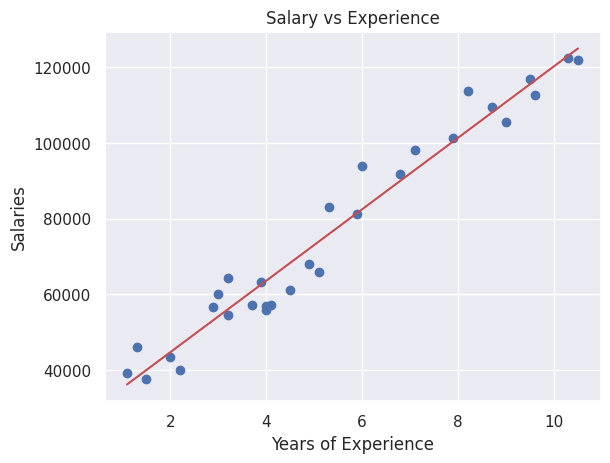

In [479]:
# Plotting the observation
plt.scatter(X, Y, color='b')

# Plotting the regression line
plt.plot(X, mymodel.predict(X), color='r')    # R의 Line 함수와 동일
plt.title("Salary vs Experience")
plt.xlabel("Years of Experience")
plt.ylabel("Salaries")
plt.show()

-> fitting된 model이 observation들을 지나고 있다.



- **Yi와 Yi^에 대한 plot**

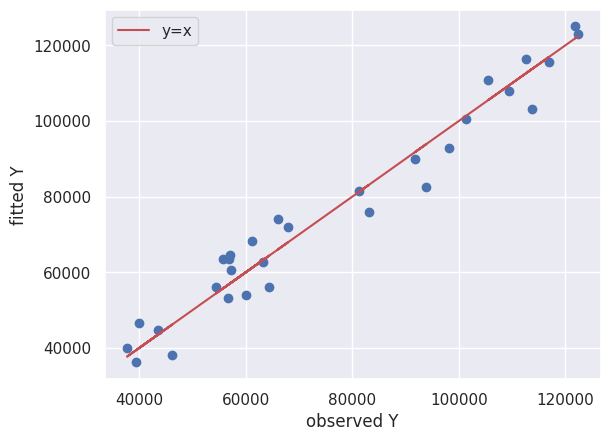

In [480]:
# Plotting the observed and fitted value
plt.scatter(Y, mymodel.predict(X), color='b')
plt.plot(Y, Y, color='r', label = "y=x")    # y=x line
plt.xlabel("observed Y")
plt.ylabel("fitted Y")
plt.legend()
plt.show()

-> Yi와 Yi^가 y=x 위에 분포되어 있으므로 model이 예측값을 잘 추정하고 있다.


- R-squared 이용하여 model 성능 판단

In [481]:
# fitting하는 model의 성능 지표 반환 방법- help 이용해 알아내기
help(LinearRegression.score)

Help on function score in module sklearn.base:

score(self, X, y, sample_weight=None)
    Return the coefficient of determination of the prediction.
    
    The coefficient of determination :math:`R^2` is defined as
    :math:`(1 - \frac{u}{v})`, where :math:`u` is the residual
    sum of squares ``((y_true - y_pred)** 2).sum()`` and :math:`v`
    is the total sum of squares ``((y_true - y_true.mean()) ** 2).sum()``.
    The best possible score is 1.0 and it can be negative (because the
    model can be arbitrarily worse). A constant model that always predicts
    the expected value of `y`, disregarding the input features, would get
    a :math:`R^2` score of 0.0.
    
    Parameters
    ----------
    X : array-like of shape (n_samples, n_features)
        Test samples. For some estimators this may be a precomputed
        kernel matrix or a list of generic objects instead with shape
        ``(n_samples, n_samples_fitted)``, where ``n_samples_fitted``
        is the number of sample

In [482]:
print(round(mymodel.score(X, Y), 3))

0.957


-> R^2의 값이 0.957로 매우 높다. = 모델이 Y 변동량의 대부분을 설명한다.

cf. 모델 평가
모델 성능 평가 지표

a) **RMSE**(Root Mean Square Error, 평균 제곱근 오차)

: 예측된 Yi^ 값들의 평균 제곱 오차의 제곱근

> RMSE = sqrt((시그마(i=1, N)[(yi - yi^)^2]) / n)

- 전반적인 모델의 정확도 측정
- 다른 모델과 비교하기 위한 기준





b) **R^2**(R-squared, 결정계수)

: 모델 데이터의 변동률 측정  
: **전체 Y의 변동량 중 모형이 설명하는 변동량의 비율**

> R^2 = 1 - (시그마(i=1, N)[(yi - yi^)^2]) / (시그마(i=1, N)[(yi - y.bar)^2])   
      = 1 - (잔차제곱합)/(Y의 총변동량) = 1 - SSE/SST   
      = (모형의 변동량)/(Y의 총 변동량) = SSR/SST   

: 모델이 데이터를 얼마나 잘 설명하고 있는지에 대한 지표

- 범위: 0~1
- 모델이 데이터에 얼마나 적합한지 평가
- 회귀분석을 설명하기 위한 용도

- 분모는 Y의 분산에 비례
- 모델에 대한 예측값이 실제값과 일치(Y^ = Y)하면 R^2 = 1



- R^2이 클수록 좋은 모형 (R^2 ↑ <->  RMSE↓)

\* "예측모형"의 목표
> 1. 가까운 미래에 잘 예측하자.
  2. 중요한 X가 무엇이고, X -> Y를 어떻게 예측하냐.

-> RMSE = 0, R^2 = 1 이라고 best model이 아님.
> Overfitting(과적합)
  overfitting model이 가까운 미래 data에서 성능이 생각보다 좋지 않다.

=> 결론: **Data를 train/test로 나누라.**(**random**하게. 겹치거나 섞이면 안 됨)
> - **train -> model Fitting**   
- **test -> model Evaluation**

=> **최적 모형: test data에서 성능이 가장 좋은 모형**  
-> Regression하면 RMSE가 작은 모형

- statsmodels 

statsmodels package- summary 함수 제공

In [483]:
import statsmodels.api as sm

X = sm.add_constant(X)    # intercept 항 추가
model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           1.14e-20
Time:                        08:35:12   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
x1          9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

t: t-test statistic(검정통계량)   
const: b0   
x1: b1   
P>|t|: 유의확률 alhpa. 통계적 가설검정이 일어났다. -> 귀무가설이 무엇인가? (귀무가설: b0=0)

\* alpha: type 1 error  
: 귀무가설에 참여하는 가정 하에 귀무가설을 기각할 확률



- 분석에 필요한 파라미터 빼내는 방법

In [484]:
print("="*30)

# extract coefficient
print("model parameters")
print(model.params)

print("="*30)

# R-squared
print("R-squared")
print(model.rsquared)

print("="*30)

# extract t-value
print("t-values")
print(model.tvalues)

print("="*30)

model parameters
[25792.20019867  9449.96232146]
R-squared
0.9569566641435086
t-values
[11.34693968 24.95009424]


### 3) multiple linear regression(MLR)

한 개의 반응변수(Y)를 예측하기 위해 여러 개의 설명변수(X)를 이용하는 방법
> Y = b0 + b1X1 + b2X2 + ... + bpXp + e

- 직선의 형태는 아니지만, 각 계수(bi)와 그 변수(Xi)들 사이의 관계는 여전히 선형 -> 선형모형



### a) import dataset

In [485]:
# import packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# library for regression
from sklearn.linear_model import LinearRegression
from sklearn import datasets

In [486]:
# import dataset
mydata = datasets.load_diabetes()
mydata.keys()

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])

In [487]:
# feature columns
df = pd.DataFrame(mydata['data'], columns = mydata['feature_names'])

# target column 추가
df['diabetes_score'] = mydata['target']

df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_score
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


-> 442 명의 사람들을 대상으로 당뇨병 수치를 추정하기 위한 10가지 feature을 나열한 데이터.
> - target: 당뇨병 수치(diabetes_score)  
- feature: feature_names(age, sex, bmi, bp 등)

\* age의 데이터 숫자가 실수형인 이유는 모든 특성이 -0.2~0.2 사이에 분포하도록 조정했기 때문.

In [488]:
print('target: diabetes_score(당뇨병 수치)')

for i, feature_name in enumerate(mydata.feature_names):   # enumerate: 인덱스와 원소로 이루어진 튜플(tuple)을 만들어줌.
  print(f'feature {i+1}: {feature_name}')

target: diabetes_score(당뇨병 수치)
feature 1: age
feature 2: sex
feature 3: bmi
feature 4: bp
feature 5: s1
feature 6: s2
feature 7: s3
feature 8: s4
feature 9: s5
feature 10: s6


- corr()과 pairplot() 이용 -> target과 변수들 간의 correlation 관찰

In [489]:
df.corr().tail(1)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,diabetes_score
diabetes_score,0.187889,0.043062,0.58645,0.441482,0.212022,0.174054,-0.394789,0.430453,0.565883,0.382483,1.0


-> target과 correlation이 가장 높은 변수: bmi

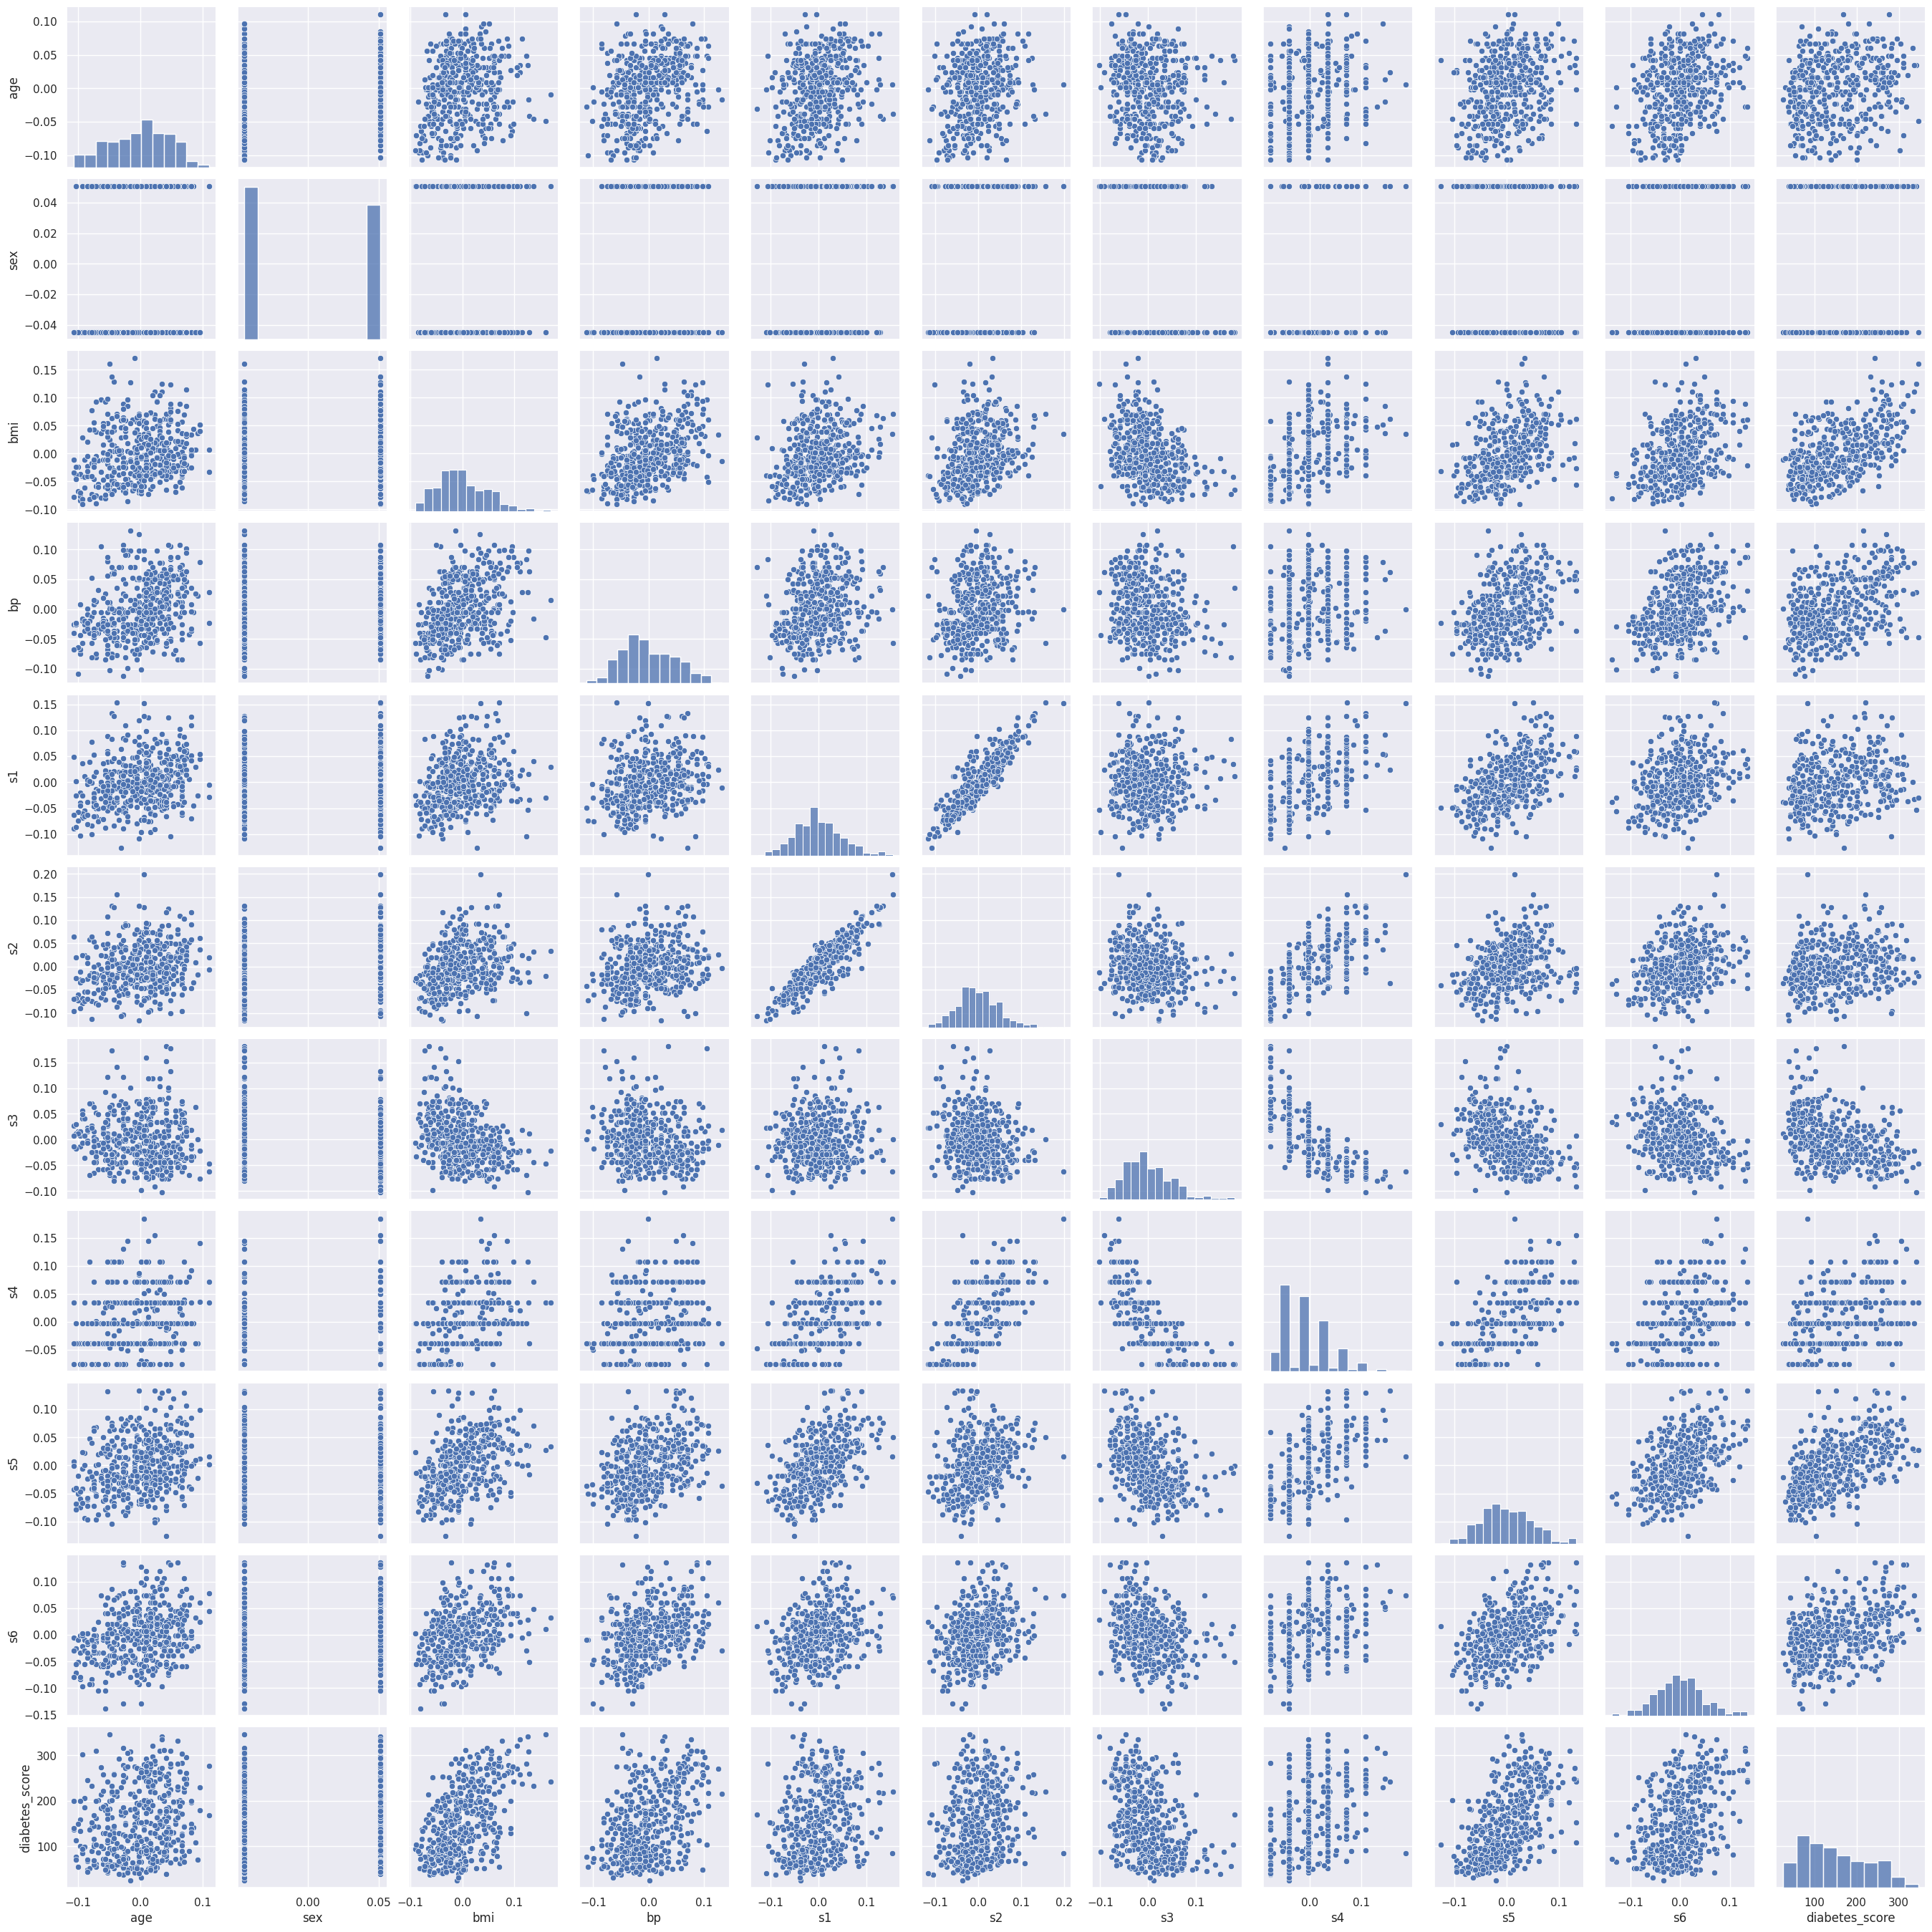

In [490]:
sns.pairplot(data=df)
plt.show()

> - scatter plot을 통해 sex는 categorical variable임을 알 수 있다. 
- s1과 s2 사이에는 강한 선형성이 관찰된다.

> 1 변수를 보고싶을 때 가장 좋은 plot: histogram(히스토그램)  
2~3 변수를 비교/보고싶을 때 가장 좋은 plot: boxplot 

In [491]:
# savefig: 파일로 저장
plt.savefig('diab.scatterplt.png')
plt.show()

<Figure size 640x480 with 0 Axes>

### b) data preprocessing

model fitting 위해 데이터 X와 Y로 나누기

In [492]:
X = df[['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']]
Y = df[['diabetes_score']] 

### c) model fitting

MLR에 위의 데이터 fitting

In [493]:
# model fitting
from sklearn.linear_model import LinearRegression
mymodel = LinearRegression()
mymodel.fit(X, Y)

LinearRegression()

LinearRegression()

In [494]:
# result
print(f'intercept: {mymodel.intercept_}')
for i, feature_name in enumerate(mydata.feature_names):
  print(f'{feature_name} coef: {mymodel.coef_[0, i]}')

intercept: [152.13348416]
age coef: -10.009866299810486
sex coef: -239.81564367242322
bmi coef: 519.845920054461
bp coef: 324.38464550232356
s1 coef: -792.1756385522308
s2 coef: 476.7390210052582
s3 coef: 101.04326793803386
s4 coef: 177.06323767134657
s5 coef: 751.273699557104
s6 coef: 67.62669218370485


-> 최종 모형이 아님. 모형 최적화 해야 함.

\* bj: 다른 설명변수들이 일정하다는 가정 하에 X3: 1↑ => Y: bj↑

\* X: scale ↑ => b↑, X: scale ↓ => b↓

### d) Test model

시각화와 R^2 값 이용 -> model 성능 판단

Yi와 Yi^을 이용 -> plot 그림

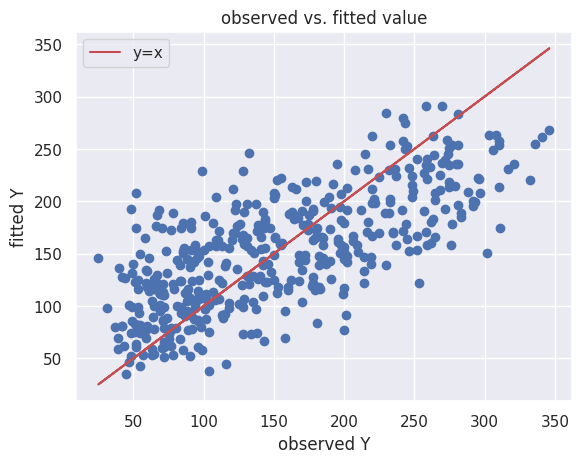

In [495]:
# Plotting the obseved and fitted value
plt.scatter(Y, mymodel.predict(X), color='b')
plt.plot(Y, Y, color='r', label='y=x')
plt.title('observed vs. fitted value')
plt.xlabel('observed Y')
plt.ylabel('fitted Y')
plt.legend()
plt.show()

=> **Yi와 Yi^가 y=x 주변에 가까이 분포되어 있다.** -> 상당히 좋은 분포

- R^2 이용하여 model의 성능 판단

In [496]:
print(round(mymodel.score(X, Y),3))

0.518


cf. statsmodel

statsmodel package의 summary 함수 결과와 비교

In [497]:
import statsmodels.api as sm
X = sm.add_constant(X)    # intercept 항 추가
model = sm.OLS(Y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         diabetes_score   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Sun, 16 Apr 2023   Prob (F-statistic):           3.83e-62
Time:                        08:36:12   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.000     147.071     157.196
age          -10.0099     59.749     -0.168      0.867    -127.446     107.426
sex         -239.8156     61.222     -3.917      0.000    -360.147    -119.484
bmi          519.8459     66.533      7.813      0.000     389.076     650.616
bp           324.3846     65.422      4.958      0.000     195.799     452.970
s1          -792.1756    416.680     -1.901      0.058   -1611.153      26.802
s2           476.7390    339.030      1.406      0.160    -189.620    1143.098
s3           101.0433    212.531      0.475      0.635    -316.684     518.770
s4           177.0632    161.476      1.097      0.273    -140.315     494.441
s5           751.2737    171.900      4.370      0.000     413.407    1089.140
s6            67.6267     65.984      1.025      0.306     -62.064     197.318
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- 설명 변수의 개수 ↑ => R-squared ↑  
-> Adj.R-squared 가 조금 낮춰줌.

- F-statistic, Prob(F-statistic)

통계적 가설검정이 일어났다
  > H0: 모든 b=0 이다. (모든 회귀계수가 0이다.)
    H1: 적어도 하나는 0이 아니다.

- t, P>|t|

통계적 가설검정이 일어났다 -> 귀무가설이 무엇인가.
  > H0: bi = 0
    H1: bi != 0

\* p-value: 귀무가설이 참이라는 가정 하에 검정통계량의 값을 관측할 확률


In [498]:
print("="*30)
# extract coefficient
print("model parameters")
print(model.params)

print("="*30)
# extract R-squared
print("R-squared")
print(model.rsquared)

print("="*30)
# extract t-value
print("t-values")
print(model.tvalues)

print("="*30)

model parameters
const    152.133484
age      -10.009866
sex     -239.815644
bmi      519.845920
bp       324.384646
s1      -792.175639
s2       476.739021
s3       101.043268
s4       177.063238
s5       751.273700
s6        67.626692
dtype: float64
R-squared
0.5177484222203498
t-values
const    59.061366
age      -0.167531
sex      -3.917126
bmi       7.813302
bp        4.958343
s1       -1.901161
s2        1.406183
s3        0.475427
s4        1.096531
s5        4.370412
s6        1.024891
dtype: float64


# 4. Classification

- Y가 범주형 자료인 경우 설명변수를 이용하여 Y를 잘 분류할 수 있는 classifier를 잘 구축하는 것이 목표
- OLS(최소제곱법) 방법을 이용할 수 X -> loss function을 이용하여 model fitting을 다른 방식으로 진행
> - Logistic Regression
  - LDA를 이용한 classification

## 1) Logistic Regression 

: 종속변수가 **범주형** 변수인 상황에서 적용할 수 있는 회귀 분석 방법
- 예측값으로 확률은 계산하여 각 클래스에 속할 확률 계산

#### **Terminology**
- 로짓(logit): 실수 전체의 범위에서 어떤 **클래스**에 속할 확률을 결정하는 함수
- 오즈(odds): 실패(0)에 대한 성공(1)의 비율. **p/(1-p)**. odd ↑ => 성공확률 ↑ 
> python => **odds = 1 / (1 + np.exp(-x))**
- 연결 함수(log odds, logit function): 계산 결과가 확률로 나오기 위해 **로짓**의 값을 입력받아 **확률**로 변환해주는 함수


#### logistic regression의 확률 p   
: target이 '1'이 될 확률
> **p = P(Y=1|x) = = e^Xb / (1 + e^Xb)**  

-> b^을 추정하면 p 계산 가능
- 0 <= p <= 1
- p > 0.5 -> log odds > 0
- p < 0.5 -> log odds < 0


#### logistic regression의 가정
> log{p/(1-p)} = b0 + b1x1 + b2x2 + ... + bpxp = log(odds) = Xb

- log odds가 X의 linear model
- -(무한대) < Xb < (무한대)


=> p와 Xb의 범위를 연결하기 위해서 link function이 필요

#### logistic regression에서 link function: **logit function**
> logit(p) = log{p/(1-p)}

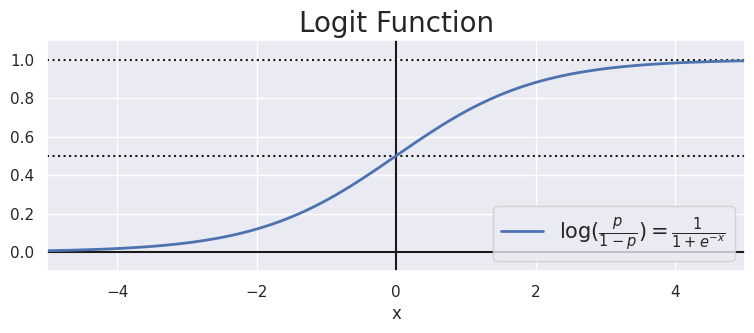

In [499]:
# plotting logit function
x = np.linspace(-5, 5, 100) # -5부터 5까지 100개의 array 나열
odds = 1 / (1 + np.exp(-x))
plt.figure(figsize=(9, 3))
plt.plot([-5,5], [0,0], "k-")
plt.plot([-5,5], [0.5, 0.5], "k:")
plt.plot([-5,5], [1, 1], "k:")
plt.plot([0,0], [-1.1, 1.1], "k-")
plt.plot(x, odds, "b-", linewidth=2, label=r"$\log(\frac{p}{1-p}) = \frac{1}{1 + e^{-x}}$")
plt.title("Logit Function", fontsize = 20)
plt.xlabel("x")
plt.legend(loc="lower right", fontsize = 15)
plt.axis([-5, 5, -0.1, 1.1])
plt.show()

logistic regression 예시

### a) import dataset

In [500]:
# import package
import pandas as pd
math = pd.read_csv("http://home.ewha.ac.kr/~josong/dm/mathcat.data", sep = '\s+')
math.head()

,hsgpa,hsengl,hscalc,course,passed,outcome
1,78.0,80,Yes,Mainstrm,No,Failed
2,66.0,75,Yes,Mainstrm,Yes,Passed
3,80.2,70,Yes,Mainstrm,Yes,Passed
4,81.7,67,Yes,Mainstrm,Yes,Passed
5,86.8,80,Yes,Mainstrm,Yes,Passed


### b) data preprocessing

In [501]:
# 필요 없는 변수 제거
math = math.drop("outcome", axis=1)

hscalc, course, passed- 범주형 변수(categorical variable)

=> 라벨 인코딩 & 원-핫 인코딩 필요

각 범주의 빈도수 확인

In [502]:
math['hscalc'].value_counts()

Yes    373
No      21
Name: hscalc, dtype: int64

In [503]:
math['passed'].value_counts()

Yes    236
No     158
Name: passed, dtype: int64

In [504]:
math['course'].value_counts()

Mainstrm    328
Catch-up     35
Elite        31
Name: course, dtype: int64

Y(target)에 해당되는 'passed' -> 라벨 인코딩

In [505]:
# 라벨 인코딩
from sklearn.preprocessing import LabelEncoder
items = math.columns[4::2]    # passed
le = LabelEncoder()

for i in items:
  math[i] = le.fit_transform(math[i])

math.head()

,hsgpa,hsengl,hscalc,course,passed
1,78.0,80,Yes,Mainstrm,0
2,66.0,75,Yes,Mainstrm,1
3,80.2,70,Yes,Mainstrm,1
4,81.7,67,Yes,Mainstrm,1
5,86.8,80,Yes,Mainstrm,1


In [506]:
mymath1 = math.copy()
mymath2 = math.copy()

hscalc, course: 범주형 변수
=> 원-핫 인코딩 이용

### 파이썬에서 원-핫 인코딩을 하기 위한 두 가지 방법
### b-1) pandas의 pd.get_dummies 함수 이용

In [507]:
import pandas as pd
pd.get_dummies(mymath1['course'])

,Catch-up,Elite,Mainstrm
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
5,0,0,1
...,...,...,...
390,0,0,1
391,0,0,1
392,0,0,1
393,0,0,1


-> course는 Catch-up, Elite, Mainstrm 3개의 범주로 이루어져 있는 변수임.


In [508]:
# hscalc도 동일한 과정 적용
mymath1 = pd.get_dummies(data=mymath1, columns = ['course', 'hscalc'], prefix = ['course', 'hsclac'])   # prefix: 원래 컬럼이름을 앞에 붙여줌
mymath1

,hsgpa,hsengl,passed,course_Catch-up,course_Elite,course_Mainstrm,hsclac_No,hsclac_Yes
1,78.0,80,0,0,0,1,0,1
2,66.0,75,1,0,0,1,0,1
3,80.2,70,1,0,0,1,0,1
4,81.7,67,1,0,0,1,0,1
5,86.8,80,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...
390,88.3,90,1,0,0,1,0,1
391,77.0,79,1,0,0,1,0,1
392,80.7,70,1,0,0,1,0,1
393,80.7,81,1,0,0,1,0,1


- LabelEncoder는 alphabetic order로 라벨 인코딩 진행
- 3개 이상의 범주형 변수에 대해 라벨 인코딩만 할 경우 파이썬은 이 변수를 numeric으로 인식하기 때문에 반드시 **원-핫 인코딩을 통해서 범주형 변수로 인식할 수 있도록 변환**해야 함.
- pd.get_dummies에서 prefix 옵션은 원래 컬럼의 이름을 앞에 붙여주도록 함

### b-2) sklearn의 OneHotEncoder 이용

벡터 입력 X  =>  reshape 메서드 통해 array로 변환 후 입력

\* linear일 때는 조심해야 함.

In [509]:
# One-hot Encoding을 할 column 추출

# mymath2[['course']]는 벡터로 추출되므로 원핫인코딩 과정에서 에러 발생
mycourse = mymath2['course']
print(type(mycourse))

<class 'pandas.core.series.Series'>


In [510]:
# Series -> array
mycourse = mycourse.values.reshape(-1, 1)
print(type(mycourse))
print(mycourse.shape)

<class 'numpy.ndarray'>
(394, 1)


In [511]:
# OneHotEncoding 모델 정의
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse = False)   # 원핫인코딩에서 데이터 array형으로 다루기 때문

\* sparse = True (디폴트) =>  Matrix 반환


In [512]:
# One-hot Encoding
ohe.fit(mycourse)
one_hot_encoded = ohe.transform(mycourse)

# dataframe
ohe_df = pd.DataFrame(one_hot_encoded, columns = ohe.categories_[0])
ohe_df

,Catch-up,Elite,Mainstrm
0,0.0,0.0,1.0
1,0.0,0.0,1.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0
...,...,...,...
389,0.0,0.0,1.0
390,0.0,0.0,1.0
391,0.0,0.0,1.0
392,0.0,0.0,1.0


- ohe_df의 index가 1부터 시작하도록 만들기

In [513]:
# mymath2와 ohe_df의 index가 다르므로 조정
ohe_df.index = ohe_df.index + 1

# 데이터 병합
mydf = pd.concat([mymath2, ohe_df], axis = 1)
mydf.head(3)

,hsgpa,hsengl,hscalc,course,passed,Catch-up,Elite,Mainstrm
1,78.0,80,Yes,Mainstrm,0,0.0,0.0,1.0
2,66.0,75,Yes,Mainstrm,1,0.0,0.0,1.0
3,80.2,70,Yes,Mainstrm,1,0.0,0.0,1.0


In [514]:
## 또 다른 범주형 변수인 hscalc도 원-핫 인코딩

# hscalc을 one-hot encoding
myhscalc = mymath2['hscalc']
myhscalc = myhscalc.values.reshape(-1,1)

ohe.fit(myhscalc)
one_hot_encoded = ohe.transform(myhscalc)

ohe_df = pd.DataFrame(one_hot_encoded, columns = ohe.categories_[0])

ohe_df.index = ohe_df.index + 1

# 데이터 병합
mydf = pd.concat([mydf, ohe_df], axis=1)
mydf

,hsgpa,hsengl,hscalc,course,passed,Catch-up,Elite,Mainstrm,No,Yes
1,78.0,80,Yes,Mainstrm,0,0.0,0.0,1.0,0.0,1.0
2,66.0,75,Yes,Mainstrm,1,0.0,0.0,1.0,0.0,1.0
3,80.2,70,Yes,Mainstrm,1,0.0,0.0,1.0,0.0,1.0
4,81.7,67,Yes,Mainstrm,1,0.0,0.0,1.0,0.0,1.0
5,86.8,80,Yes,Mainstrm,1,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
390,88.3,90,Yes,Mainstrm,1,0.0,0.0,1.0,0.0,1.0
391,77.0,79,Yes,Mainstrm,1,0.0,0.0,1.0,0.0,1.0
392,80.7,70,Yes,Mainstrm,1,0.0,0.0,1.0,0.0,1.0
393,80.7,81,Yes,Mainstrm,1,0.0,0.0,1.0,0.0,1.0


- 기존의 hscalc, course 제거

In [515]:
mydf.drop(["hscalc", "course"], axis=1)

,hsgpa,hsengl,passed,Catch-up,Elite,Mainstrm,No,Yes
1,78.0,80,0,0.0,0.0,1.0,0.0,1.0
2,66.0,75,1,0.0,0.0,1.0,0.0,1.0
3,80.2,70,1,0.0,0.0,1.0,0.0,1.0
4,81.7,67,1,0.0,0.0,1.0,0.0,1.0
5,86.8,80,1,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...
390,88.3,90,1,0.0,0.0,1.0,0.0,1.0
391,77.0,79,1,0.0,0.0,1.0,0.0,1.0
392,80.7,70,1,0.0,0.0,1.0,0.0,1.0
393,80.7,81,1,0.0,0.0,1.0,0.0,1.0


- 데이터 X, Y로 나누기

In [516]:
Y = mymath1.iloc[:, 2]
mymath1.pop("passed")
X = mymath1.iloc[:, :]

### c) model fitting

In [517]:
from sklearn.linear_model import LogisticRegression

import warnings
warnings.filterwarnings(action = 'ignore')

mymodel = LogisticRegression()
mymodel.fit(X, Y)

LogisticRegression()

### d) Test model

학습된 모델의 예측값과 실제값을 confusion matrix를 이용해 판단

In [518]:
# confusion matrix
from sklearn.metrics import confusion_matrix
mymtx = confusion_matrix(mymodel.predict(X), Y)
mymtx

array([[ 98,  38],
       [ 60, 198]])

In [519]:
# misclass rate
misclass_rate = (mymtx[0,1] + mymtx[1,0]) / (np.sum(np.sum(mymtx)))
misclass_rate

0.24873096446700507

-> 98명(No), 198명(Yes)에 대해 올바르게 추정. 60명과 38명에 대해서는 잘못 분류.

=> 경계 확률을 변화시키면서 오분류율이 작아지도록 더 좋은 추정결과 찾아보자.

- 분류 경계 확률 0.4~0.6 사이에서 0.001씩 증가시켜 **오분류율 최소화하는 경계 확률**과 그때의 **오분류율** 구하기

In [520]:
# range() float형이 들어갈 수 없으므로 float을 삽입할 수 있는 range 함수 정의
def range_with_floats(start, stop, step):
  while stop > start:
    yield start
    start += step

# class 1에 속할 확률, [:0]인 경우 class 0에 속할 확률
prob = mymodel.predict_proba(X)[:, 1]

# 값들을 저장할 list와 dictionary
mylist = []
res= {}

n = len(math)

# 최소의 오분류율을 만드는 경계확률을 찾기 위한 반복문
for i in range_with_floats(0.4, 0.601, 0.001):
  for j in range(0,n):
    # 경계확률보다 크면 class 1 으로 분류, 아니면 0 으로 분류
    if prob[j] >= i:
      mylist.append(1)
    else:
      mylist.append(0)

  # 오분류를 구하기 위해 필요한 confusion matrix
  mymtx = confusion_matrix(mylist, Y)

  # 오분류율 계산
  missrate = (mymtx[0, 1] + mymtx[1, 0]) / np.sum(np.sum(mymtx))

  # dictionary에 경계확률을 key로 오분류율을 value로 저장
  res[round(i,3)] = round(missrate, 4)

  # list 초기화
  mylist = []

In [521]:
print(f'최소의 오분류율은 {min(res.values())} 이며 이때의 경계확률은{min(res, key = res.get)} 이다.')

최소의 오분류율은 0.2437 이며 이때의 경계확률은0.512 이다.


cf. statsmodel

statsmodel package의 summary 함수 결과와 비교

In [522]:
import statsmodels.api as sm

# intercept 항 추가
X = sm.add_constant(X)

# model fitting
model = sm.Logit(Y,X).fit()

# summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.534132
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                 passed   No. Observations:                  394
Model:                          Logit   Df Residuals:                      388
Method:                           MLE   Df Model:                            5
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                  0.2068
Time:                        08:36:14   Log-Likelihood:                -210.45
converged:                       True   LL-Null:                       -265.33
Covariance Type:            nonrobust   LLR p-value:                 4.605e-22
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -8.0872        nan        nan        nan         nan         nan
hsgpa         

In [523]:
print("="*30)
# extract coefficient
print("model parameters")
print(model.params)

print("="*30)
# extract t-value
print("t-values")
print(model.tvalues)

print("="*30)

model parameters
const             -8.087162
hsgpa              0.220355
hsengl            -0.036188
course_Catch-up   -3.549221
course_Elite      -1.869147
course_Mainstrm   -2.668803
hsclac_No         -4.672169
hsclac_Yes        -3.414990
dtype: float64
t-values
const                       NaN
hsgpa              7.335917e+00
hsengl            -2.037729e+00
course_Catch-up   -4.078574e-07
course_Elite      -2.147923e-07
course_Mainstrm   -3.096193e-07
hsclac_No         -1.990703e+00
hsclac_Yes        -1.561068e+00
dtype: float64


In [524]:
# R과 동일한 회귀계수가 나오도록 X를 다음과 같이 변경 후 모델의 결과 확인
X = mymath1[['hsgpa', 'hsengl', 'hsclac_Yes', 'course_Elite', 'course_Mainstrm']]   # (level - 1)개만 keep
X

,hsgpa,hsengl,hsclac_Yes,course_Elite,course_Mainstrm
1,78.0,80,1,0,1
2,66.0,75,1,0,1
3,80.2,70,1,0,1
4,81.7,67,1,0,1
5,86.8,80,1,0,1
...,...,...,...,...,...
390,88.3,90,1,0,1
391,77.0,79,1,0,1
392,80.7,70,1,0,1
393,80.7,81,1,0,1


In [525]:
import statsmodels.api as sm

# intercept 항 추가
X = sm.add_constant(X)

# model fitting
model = sm.Logit(Y, X).fit()

# summary
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.534132
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 passed   No. Observations:                  394
Model:                          Logit   Df Residuals:                      388
Method:                           MLE   Df Model:                            5
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                  0.2068
Time:                        08:36:14   Log-Likelihood:                -210.45
converged:                       True   LL-Null:                       -265.33
Covariance Type:            nonrobust   LLR p-value:                 4.605e-22
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -16.3086      2.162     -7.543      0.000     -20.546     -12.071
hsgpa         

-> R과 동일한 결과

cf. **GLM(Generalized Linear Model)**
> 로지스틱 모형: target이 1에 대한 로그 오즈 값  
  실제 관찰한 데이터: 출력값(target이 0 혹은 1)

=> 이 결과를 fitting 하기 위한 방법 필요

> logistic regression: 선형회귀를 확장한 일반화선형모형(GLM, generalizef linear model)의 specail case

## 2) LDA(Linear Discriminant Analysis)

: 종속변수를 분류하기 위한 모델

: **각 범주에 속할 '확률'**을 예측하는 형태로 분류
Y
LDA의 두 가지 가정
> - 각 class가 **정규분포** 형태의 확률분포를 가진다.
- 각 class는 **같은 형태의 공분산 구조**를 가진다.

ex.
설명변수의 class K개(k=1,...,K) 존재, 설명변수의 개수 p(p-dim)개 라고 가정.

>  P(X|Y = K)가 정규분포를 따른다.  
 LDA를 이용하여 계산하는 것은 P(Y = K|X). class conditional probability.



### a) import dataset

In [526]:
# import package
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# import dataset
myiris = datasets.load_iris()

print(myiris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

b) data preprocessing

In [527]:
X = myiris.data
Y = myiris.target

target_names = myiris.target_names

In [528]:
print(Y)

print(target_names)
print(X.shape)
print(X[:5])  # head
print(X[0:4]) # head
print(x[-5:]) # tail

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']
(150, 4)
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]]
[4.5959596 4.6969697 4.7979798 4.8989899 5.       ]


### c) model fitting

In [529]:
# LDA
lda = LinearDiscriminantAnalysis(n_components = 2)  # n_components = (number of class) - 1
res = lda.fit(X, Y).transform(X)

### d) Test model

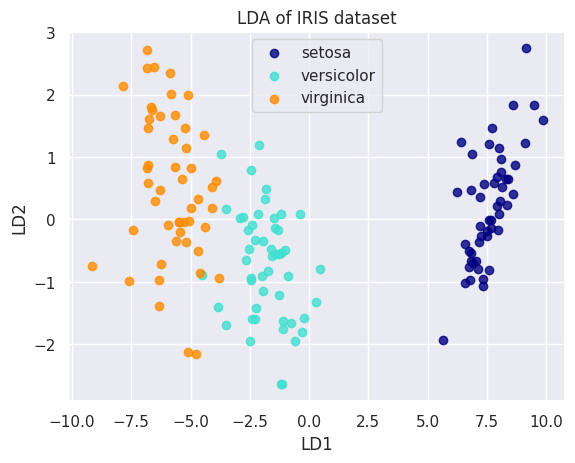

In [530]:
# visualization
plt.figure()
colors = ['navy', 'turquoise', 'darkorange']

for color, i, target_name in zip(colors, [0, 1,2], target_names):
  plt.scatter(res[Y == i, 0], res[Y == i, 1], alpha = 0.8, color = color, label = target_name)

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc = 'best', shadow = False, scatterpoints = 1)   # loc = 'best': 자기가 알아서 빈 곳에 가져다 놓는 것

# scatterpoints는 legend 안의 마커포인트 수를 입력받음
plt.title("LDA of IRIS dataset")

plt.show()

confusion matrix 이용하여 오분류 관찰

In [531]:
# import package
## from sklearn.metrics import confusion_matrix, plot_confusion_matrix

# confusion matrix
label = ['setosa', 'versicolor', 'virginica']   # 라벨설정
## plot = plot_confusion_matrix(lda,
##                             X, Y,
##                             display_labels =label,
##                             cmap = plt.cm.Reds,
##                             normalize = None)
## plot.ax_set_title('Confusion Matrix')
## plt.show()

In [532]:
# confusion matrix
from sklearn.metrics import confusion_matrix
mymtx = confusion_matrix(Y, lda.predict(X))
mymtx

array([[50,  0,  0],
       [ 0, 48,  2],
       [ 0,  1, 49]])

=> 다른 종에 비해 setosa의 분류 정확도가 높다.

In [533]:
import pandas as pd

table = pd.DataFrame(mymtx, columns = label, index = label)
table

,setosa,versicolor,virginica
setosa,50,0,0
versicolor,0,48,2
virginica,0,1,49
